<a href="https://colab.research.google.com/github/Aqsa0308/Projects/blob/main/Coffee_House_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This section contains starting from importing libraries to upload the data#

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import plotly.express as xps
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
!pip install pycaret
from pycaret.classification import*
from google.colab import files

In [108]:
# Load CSV Data into Dataframe#
df = pd.read_csv('/content/coffee-house-satisfactory-survey.csv')

# Steps for Data Pre-processing#

In [109]:
# Checking out dataset information#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                                     --------------  ----- 
 0   Timestamp                                                                                                                  122 non-null    object
 1   1. Your Gender                                                                                                             122 non-null    object
 2   2. Your Age                                                                                                                122 non-null    object
 3   3. Are you currently....?                                                                                                  122 non-null

In [110]:
df.isnull().sum()

Timestamp                                                                                                                    0
1. Your Gender                                                                                                               0
2. Your Age                                                                                                                  0
3. Are you currently....?                                                                                                    0
4. What is your annual income?                                                                                               0
5. How often do you visit Coffee House?                                                                                      0
6. How do you usually enjoy Coffee House?                                                                                    1
7. How much time do you normally  spend during your visit?                                                     

In [111]:
df = df.dropna()

In [112]:
# Checking Features before preprocessing#
df.head()

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Coffee House?,6. How do you usually enjoy Coffee House?,7. How much time do you normally spend during your visit?,8. The nearest Coffee House's outlet to you is...?,9. Do you have Coffee House membership card?,...,"11. On average, how much would you spend at Coffee House per visit?","12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Coffee House?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)",16. You rate the WiFi quality at Coffee House as..,"17. How would you rate the service at Coffee House? (Promptness, friendliness, etc..)",18. How likely you will choose Coffee House for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Coffee House? Check all that apply.,20. Will you continue buying Coffee House?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [113]:
#Renaming columns name#
df.rename(columns={'1. Your Gender': 'Gender', '2. Your Age': 'Age', '3. Are you currently....?': 'Occupation Status', '4. What is your annual income?': 'Annual Income', '5. How often do you visit Coffee House?': 'Frequency of Visit',
                   '9. Do you have Coffee House membership card?': 'Membership',
                  '14. How important are sales and promotions in your purchase decision?': 'Factors to purchase Decision',
                   '7. How much time do you normally  spend during your visit?': 'Time spend at cafe', '16. You rate the WiFi quality at Coffee House as..': 'Rate WiFi Quality',
'15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)': 'Ambiance Rate', '17. How would you rate the service at Coffee House? (Promptness, friendliness, etc..)': 'Rate service quality',
                    '10. What do you most frequently purchase at Coffee House?': 'Frequent purchase at coffee house','11. On average, how much would you spend at Coffee House per visit?': 'Per visit spend at coffee house',
                   '19. How do you come to hear of promotions at Coffee House? Check all that apply.': 'Medium of promotions', '13. How would you rate the price range at Coffee House?': 'Rate of price range',
                   '6. How do you usually enjoy Coffee House?':'Frequency enjoying coffe house',
                   '12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:' : 'Rate quality of coffee',
                   "8. The nearest Coffee House's outlet to you is...?": "Nearest coffee house", '18. How likely you will choose Coffee House for doing business meetings or hangout with friends?':'Choose for business meeting or hangout',
                   '20. Will you continue buying Coffee House?': 'Buying Coffee?'}, inplace=True)

In [114]:
# New names of each column/feature#
df.columns

Index(['Timestamp', 'Gender', 'Age', 'Occupation Status', 'Annual Income',
       'Frequency of Visit', 'Frequency enjoying coffe house',
       'Time spend at cafe', 'Nearest coffee house', 'Membership',
       'Frequent purchase at coffee house', 'Per visit spend at coffee house',
       'Rate quality of coffee', 'Rate of price range',
       'Factors to purchase Decision', 'Ambiance Rate', 'Rate WiFi Quality',
       'Rate service quality', 'Choose for business meeting or hangout',
       'Medium of promotions', 'Buying Coffee?'],
      dtype='object')

In [115]:
df['Buying Coffee?'].value_counts()

Buying Coffee?
Yes    94
No     27
Name: count, dtype: int64

In [116]:
# Checking data after renaming each feature#
df.head(10)

,Timestamp,Gender,Age,Occupation Status,Annual Income,Frequency of Visit,Frequency enjoying coffe house,Time spend at cafe,Nearest coffee house,Membership,...,Per visit spend at coffee house,Rate quality of coffee,Rate of price range,Factors to purchase Decision,Ambiance Rate,Rate WiFi Quality,Rate service quality,Choose for business meeting or hangout,Medium of promotions,Buying Coffee?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes
5,2019/10/01 12:39:39 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,more than 3km,No,...,Less than RM20,4,3,5,5,4,5,4,Social Media,Yes
6,2019/10/01 12:39:42 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Below 30 minutes,within 1km,Yes,...,Around RM20 - RM40,5,5,5,5,3,5,5,Starbucks Website/Apps;Social Media,Yes
7,2019/10/01 12:40:58 PM GMT+8,Male,From 20 to 29,Employed,"RM50,000 - RM100,000",Rarely,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,2,3,3,3,3,3,Starbucks Website/Apps;Social Media;Emails;Thr...,Yes
8,2019/10/01 12:42:27 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Drive-thru,Below 30 minutes,more than 3km,Yes,...,More than RM40,5,4,4,4,4,4,4,Starbucks Website/Apps;Social Media;Through fr...,Yes
9,2019/10/01 12:43:36 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Take away,Below 30 minutes,more than 3km,No,...,Around RM20 - RM40,4,3,3,4,3,3,4,Social Media;Through friends and word of mouth,Yes


# EDA - Exploratory Data Analysis - Understanding of data distribution using visualization#

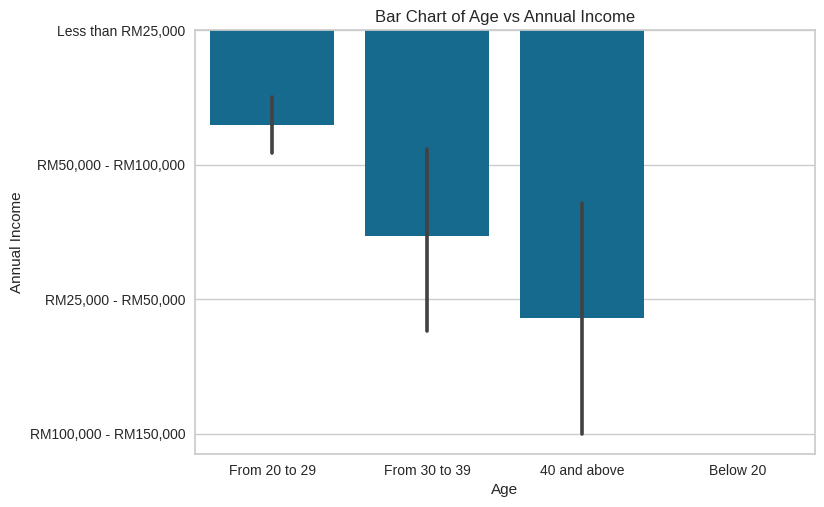

In [117]:
sns.barplot(x='Age', y='Annual Income', data=df)
plt.title('Bar Chart of Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

In [118]:
numerical_features = ['Rate quality of coffee',
                      'Rate of price range', 'Ambiance Rate', 'Rate WiFi Quality', 'Rate service quality']


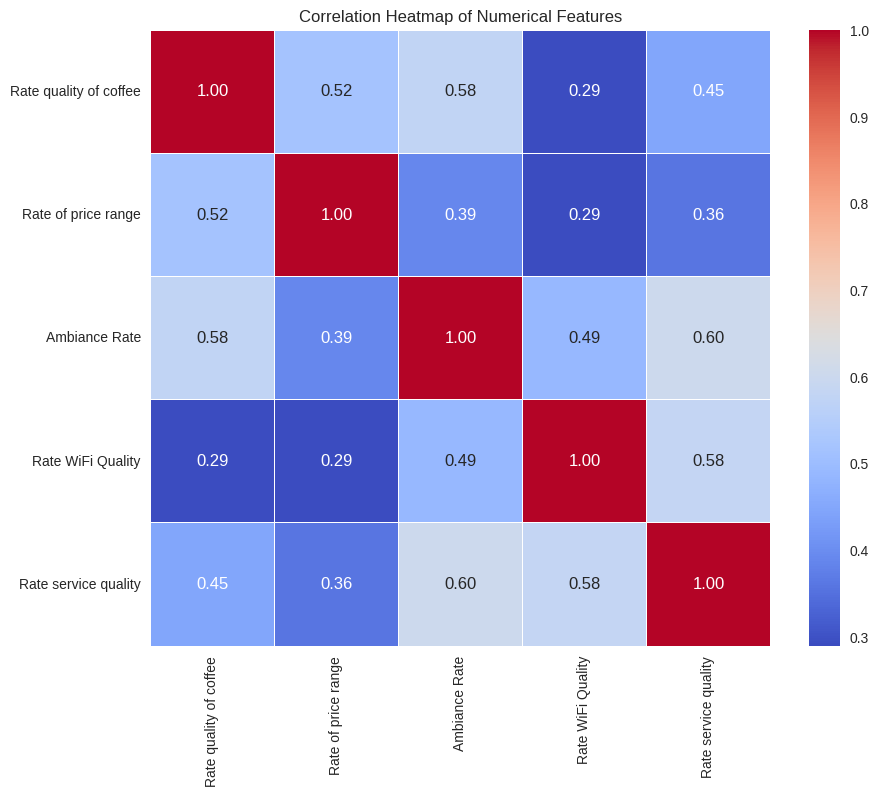

In [119]:
# Calculate the correlation matrix
corr = df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

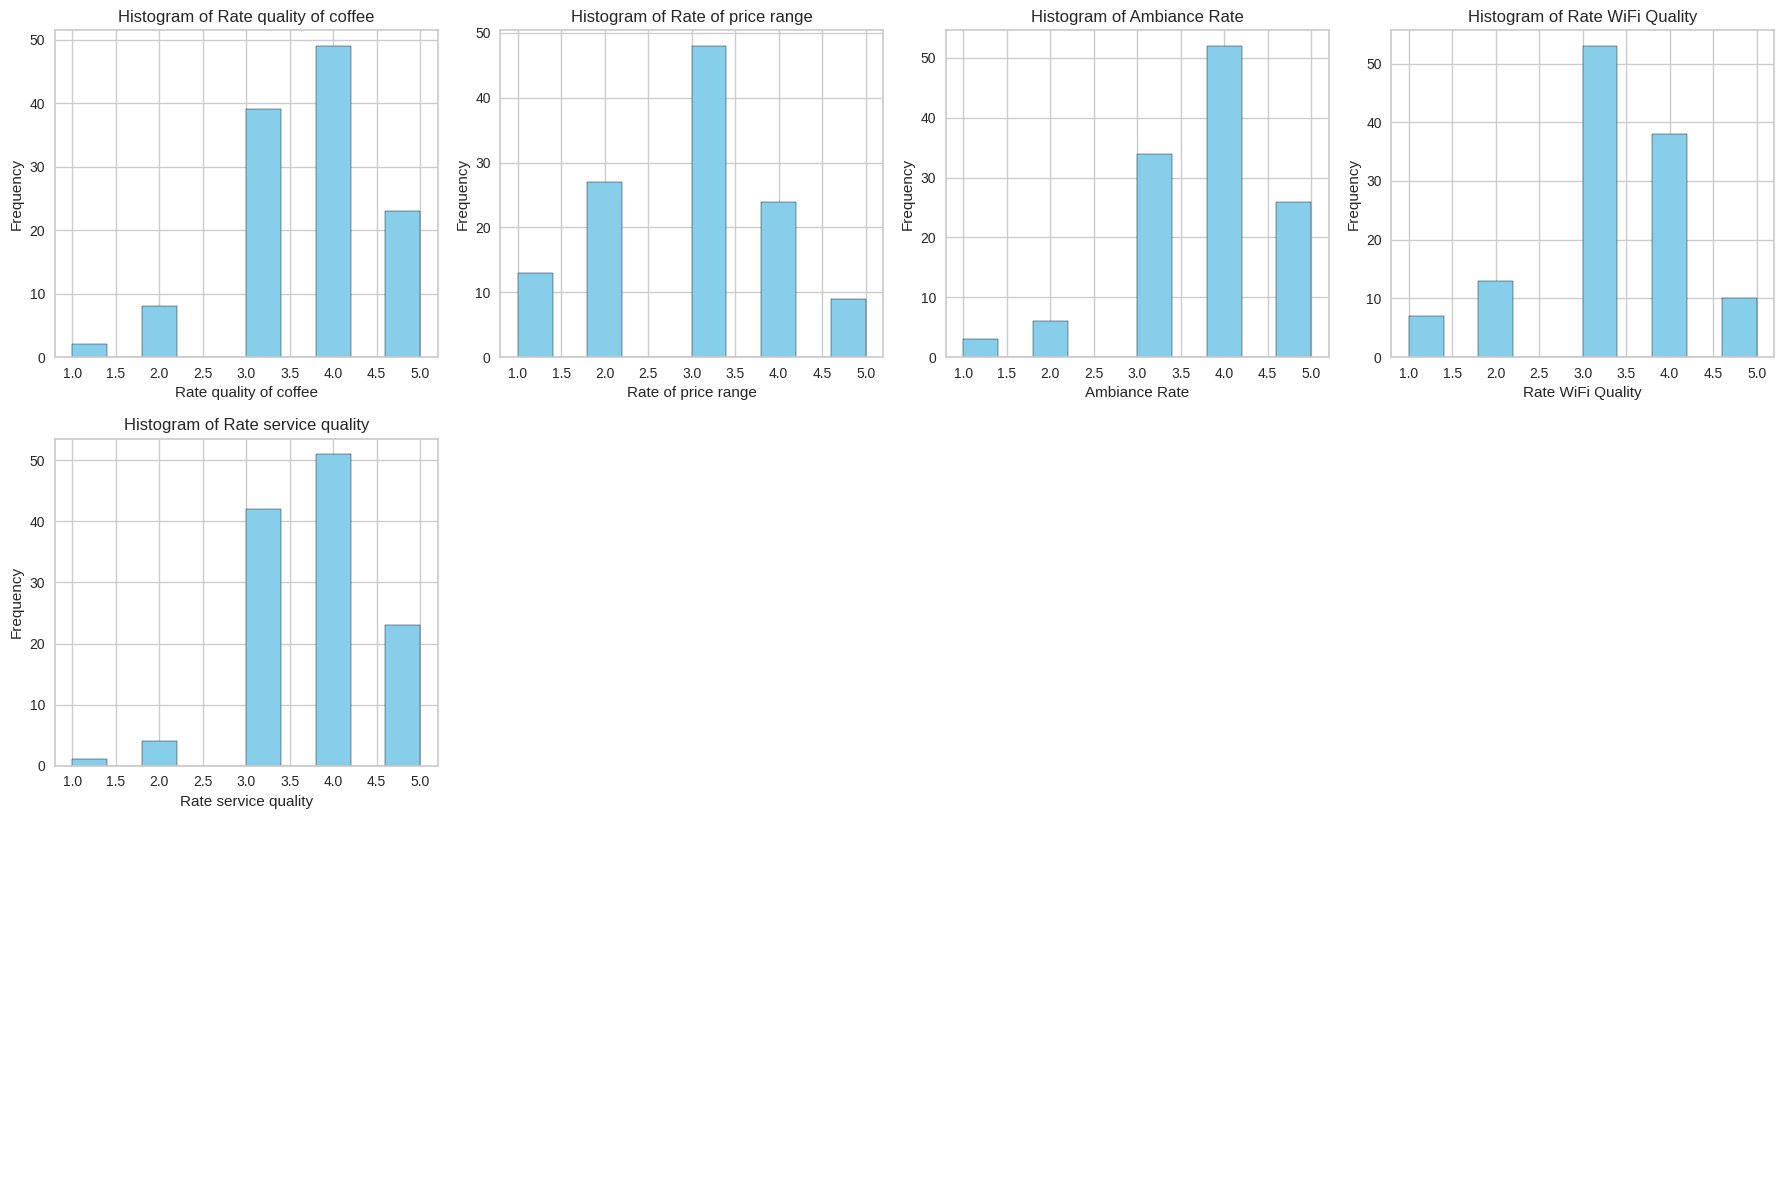

In [120]:
# Assuming df is your DataFrame and numerical_features is a list of numerical column names
num_rows = 3
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    axes[i].hist(df[feature], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Hide empty subplots
for j in range(len(numerical_features), num_rows*num_cols):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [121]:
categorical_features = ['Gender', 'Occupation Status', 'Nearest coffee house', 'Membership', 'Frequency of Visit', 'Annual Income','Buying Coffee?']

In [122]:
category_counts = df[categorical_features].value_counts()

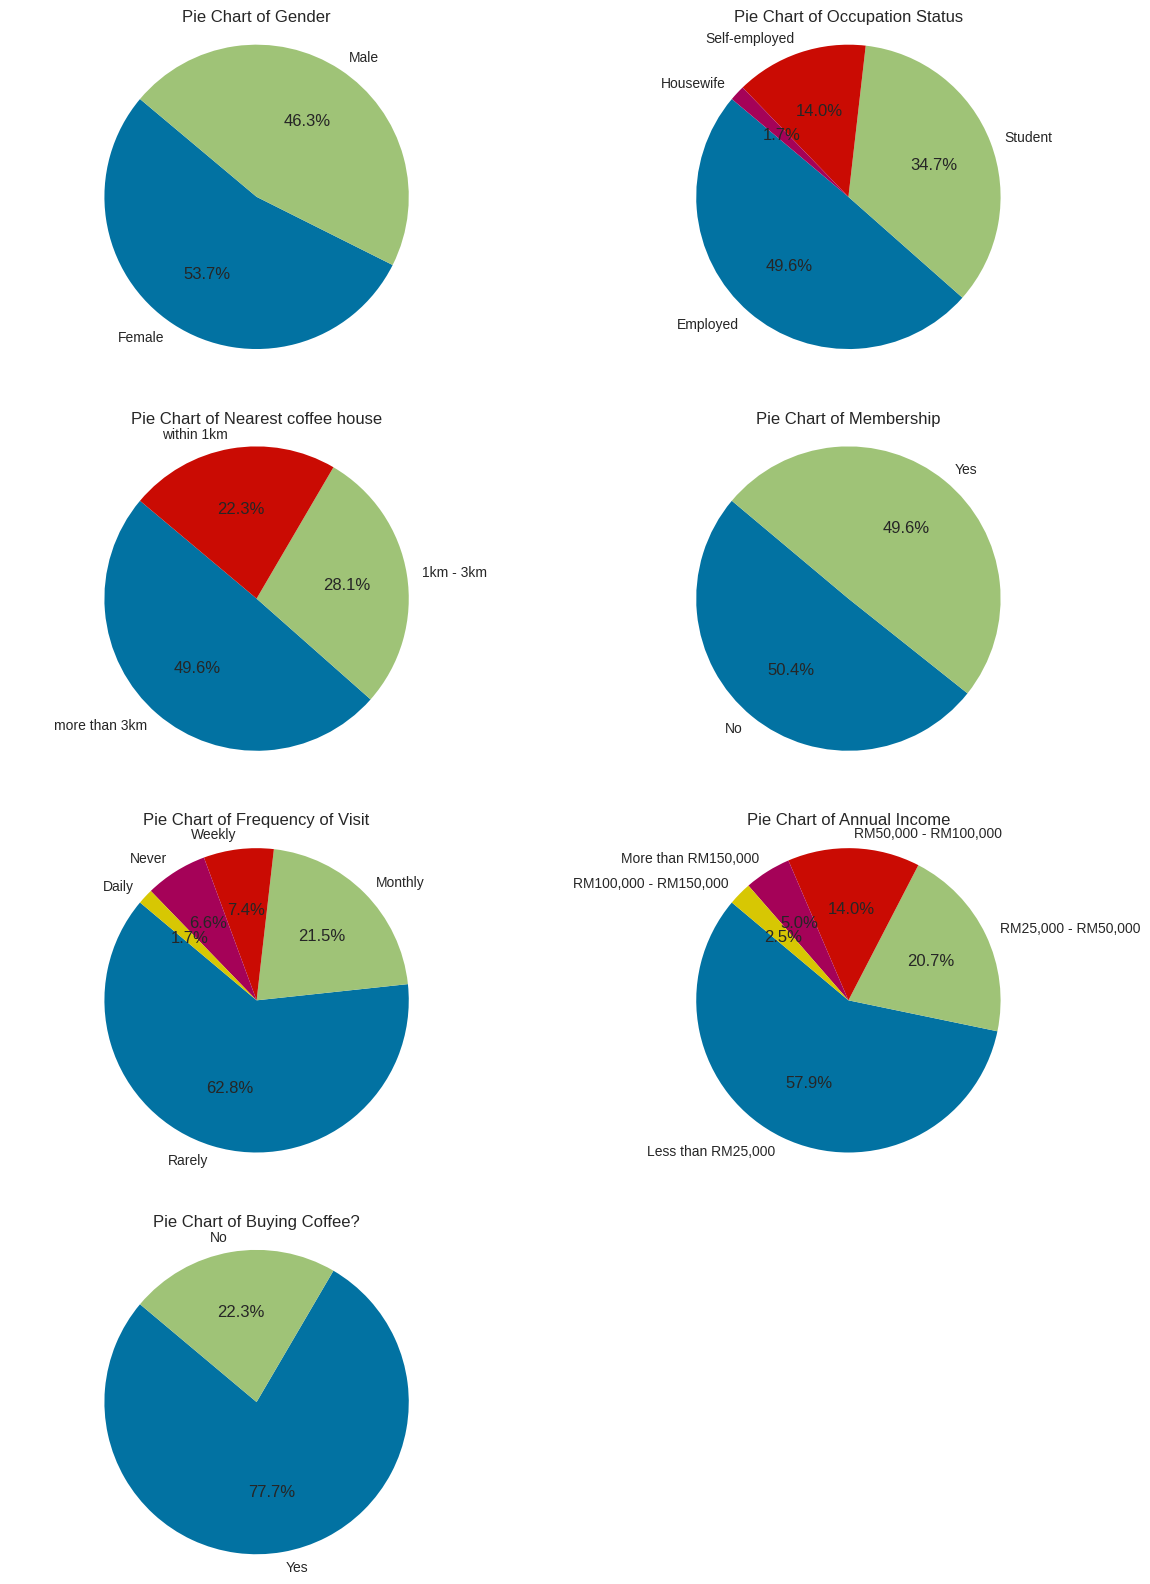

In [123]:
# Create subplots for pie charts
num_plots = len(categorical_features)
num_cols = 2
num_rows = (num_plots + 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, num_rows*5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create pie charts for each categorical feature
for i, feature in enumerate(categorical_features):
    category_counts = df[feature].value_counts()
    axes[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Pie Chart of {feature}')
    axes[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Remove empty subplots
for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])


# Feature Engineering - Starting from to convert categorical data into numerical to further prepare for machine learning#

In [124]:
# Sincer gender were given into two values 'male' and 'female'. Turned these categorical values into numeric by applying OneHotEncoder#

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Apply OneHotEncoder to the Gender column and fit_transform
encoded_data = encoder.fit_transform(df[['Gender', 'Membership']])

# Get the column names for the one-hot encoded features
encoded_column_names = encoder.get_feature_names_out(['Gender', 'Membership'])

# Create a DataFrame from the encoded data with appropriate column names
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoded_column_names)

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original 'Gender' column as it's no longer needed
df.drop(['Gender', 'Membership'], axis=1, inplace=True)

# Display the resulting DataFrame
print(df)

                        Timestamp            Age Occupation Status  \
0    2019/10/01 12:38:43 PM GMT+8  From 20 to 29           Student   
1    2019/10/01 12:38:54 PM GMT+8  From 20 to 29           Student   
2    2019/10/01 12:38:56 PM GMT+8  From 20 to 29          Employed   
3    2019/10/01 12:39:08 PM GMT+8  From 20 to 29           Student   
4    2019/10/01 12:39:20 PM GMT+8  From 20 to 29           Student   
..                            ...            ...               ...   
118   2019/10/04 9:30:09 AM GMT+8  From 20 to 29          Employed   
119   2019/10/04 1:46:07 PM GMT+8  From 20 to 29           Student   
120  2019/10/05 11:01:14 AM GMT+8  From 20 to 29          Employed   
121   2019/10/05 4:57:22 PM GMT+8  From 20 to 29          Employed   
81                            NaN            NaN               NaN   

            Annual Income Frequency of Visit Frequency enjoying coffe house  \
0      Less than RM25,000             Rarely                        Dine in   
1

In [125]:
# Checking value counts for Age feature to calculate average age#
Age_counts = df['Age'].value_counts()
print(Age_counts)

Age
From 20 to 29    84
From 30 to 39    17
Below 20         13
40 and above      7
Name: count, dtype: int64


In [126]:
# Defining mapping with average age for each age bracket#
age_mapping = {
    'From 20 to 29': 25,
    'From 30 to 39': 35,
    'Below 20': 10,  # Assumption for below 20
    '40 and above': 70  # Assumption for 40 and above
}
df['Average Age'] = df['Age'].map(age_mapping)  #New column created name 'Average Age'#
New_Age = df.groupby('Age')['Average Age'].mean()

In [127]:
print(New_Age)

Age
40 and above     70.0
Below 20         10.0
From 20 to 29    25.0
From 30 to 39    35.0
Name: Average Age, dtype: float64


In [128]:
# Checking value counts for Annual Income feature to calculate average Income#
AnnualIncome_counts = df['Annual Income'].value_counts()
print(AnnualIncome_counts)

Annual Income
Less than RM25,000       70
RM25,000 - RM50,000      25
RM50,000 - RM100,000     17
More than RM150,000       6
RM100,000 - RM150,000     3
Name: count, dtype: int64


In [129]:
# Defining mapping with average agincome for each income bracket#
income_mapping = {
    'Less than RM25,000': 25000,
    'RM25,000 - RM50,000': 37500,  # Average of 25,000 and 50,000
    'RM50,000 - RM100,000': 75000,  # Average of 50,000 and 100,000
    'More than RM150,000': 200000,  # Assuming a value
    'RM100,000 - RM150,000': 125000  # Average of 100,000 and 150,000
}
df['Numerical Income'] = df['Annual Income'].map(income_mapping) # New Column created name 'Numerucal Income'#
Average_Income = df.groupby('Annual Income')['Numerical Income'].mean()

In [130]:
print(Average_Income)

Annual Income
Less than RM25,000        25000.0
More than RM150,000      200000.0
RM100,000 - RM150,000    125000.0
RM25,000 - RM50,000       37500.0
RM50,000 - RM100,000      75000.0
Name: Numerical Income, dtype: float64


In [131]:
# Checking value counts for Nearest coffee House feature to calculate average distance#
df['Nearest coffee house'].value_counts()

Nearest coffee house
more than 3km    60
1km - 3km        34
within 1km       27
Name: count, dtype: int64

In [132]:
# Defining mapping with average distance for each distance bracket#
distance_mapping = {
    'more than 3km': 5,
    '1km - 3km': 2,  # Average distance
    'within 1km': 0.5,  # Average distance
}
df['Numerical Distance'] = df['Nearest coffee house'].map(distance_mapping) #New column created name 'Numerical distance'#
Average_distance = df.groupby('Nearest coffee house')['Numerical Distance'].mean()

In [133]:
print(Average_distance)

Nearest coffee house
1km - 3km        2.0
more than 3km    5.0
within 1km       0.5
Name: Numerical Distance, dtype: float64


In [134]:
# Checking value counts for Time spend at cafe feature to calculate average Time spend#
df['Time spend at cafe'].value_counts()

Time spend at cafe
Below 30 minutes                72
Between 30 minutes to 1 hour    34
Between 1 hour to 2 hours       12
More than 3 hours                2
Between 2 hours to 3 hours       1
Name: count, dtype: int64

In [135]:
# Defining mapping with Time spend at cafe for each time spend at cafe bracket#
time_mapping = {
    'Below 30 minutes': 15,  # Assuming a value
    'Between 30 minutes to 1 hour': 45,  # Average of 30 minutes and 1 hour
    'Between 1 hour to 2 hours': 90,  # Average of 1 hour and 2 hours
    'More than 3 hours': 180,  # Assuming a value
    'Between 2 hours to 3 hours': 150  # Average of 2 hours and 3 hours
}
#converting bracket values acooridng to mapping above#
df['Numerical Time'] = df['Time spend at cafe'].map(time_mapping) #New name of the column is Numerical Time#
#Taking mean value of each bracket of time spend at cafe#
Averagetime_spend = df.groupby('Time spend at cafe')['Numerical Time'].mean()
print(Averagetime_spend)

Time spend at cafe
Below 30 minutes                 15.0
Between 1 hour to 2 hours        90.0
Between 2 hours to 3 hours      150.0
Between 30 minutes to 1 hour     45.0
More than 3 hours               180.0
Name: Numerical Time, dtype: float64


In [136]:
spend_at_coffeeHouse = df['Per visit spend at coffee house'].value_counts()
print(spend_at_coffeeHouse)

Per visit spend at coffee house
Less than RM20        58
Around RM20 - RM40    45
Zero                  11
More than RM40         7
Name: count, dtype: int64


In [137]:
Averagespend_mapping = {
    'Less than RM20': 15,  # Assuming a value
    'Around RM20 - RM40': 30,  # Average of RM30 spend
    'Zero': 0,  # Average 0
    'More than RM40': 40,  # Assuming a value
}
#converting bracket values acooridng to mapping above#
df['Average spend'] = df['Per visit spend at coffee house'].map(Averagespend_mapping)
#Taking mean value of each bracket of per visit spend at coffee#
AvgspendatcoffeeHouse = df.groupby('Per visit spend at coffee house')['Average spend'].mean()
print(AvgspendatcoffeeHouse)

Per visit spend at coffee house
Around RM20 - RM40    30.0
Less than RM20        15.0
More than RM40        40.0
Zero                   0.0
Name: Average spend, dtype: float64


In [138]:
Frequency_visits = df['Frequency of Visit'].value_counts()
print(Frequency_visits)

Frequency of Visit
Rarely     76
Monthly    26
Weekly      9
Never       8
Daily       2
Name: count, dtype: int64


In [139]:
frequencyvisit_mapping = {
    'Rarely': 1,
    'Monthly': 2,
    'Weekly': 3,
    'Never': 0,
    'Daily': 4
}

# Mapping the categorical values to numerical values
df['Frequency of visit (Numerical)'] = df['Frequency of Visit'].map(frequencyvisit_mapping)

In [140]:
# Checking value counts for Age feature to calculate average age#
OccupationStatus_counts = df['Occupation Status'].value_counts()
print(OccupationStatus_counts)

Occupation Status
Employed         60
Student          42
Self-employed    17
Housewife         2
Name: count, dtype: int64


In [141]:
OccupationStatus_mapping = {
    'Employed': 1,
    'Student': 2,
    'Self-employed': 3,
    'Housewife': 0,
}

# Mapping the categorical values to numerical values
df['OccupationStatus (Numerical)'] = df['Occupation Status'].map(OccupationStatus_mapping)

In [142]:
similar_values = {'Never': 'never', 'Never buy':'never'}
df['Frequency_enjoying_coffee_house'] = df['Frequency enjoying coffe house'].replace(similar_values)

In [143]:
Frequency_enjoying = df['Frequency_enjoying_coffee_house'].value_counts()
print(Frequency_enjoying)

Frequency_enjoying_coffee_house
Take away             49
Dine in               46
Drive-thru            20
never                  5
I dont like coffee     1
Name: count, dtype: int64


In [144]:
Frequency_enjoying_mapping = {
    'Take away': 1,
    'Dine in': 2,
    'Drive-thru': 3,
    'never': 0,
    'I dont like coffee': 4,
}

# Mapping the categorical values to numerical values
df['EnjoyingFrequency (Numerical)'] = df['Frequency_enjoying_coffee_house'].map(Frequency_enjoying_mapping)

In [145]:
FrequentPurchase = df['Frequent purchase at coffee house'].value_counts()
print(FrequentPurchase )

Frequent purchase at coffee house
Coffee                                           65
Cold drinks                                      25
Coffee;Pastries                                   6
Coffee;Cold drinks                                6
Coffee;Sandwiches                                 3
Pastries                                          2
Cold drinks;Juices;Pastries                       2
Coffee;Pastries;Sandwiches                        1
Coffee;Juices;Pastries;Sandwiches                 1
Cold drinks;Pastries                              1
Coffee;Cold drinks;Pastries;Sandwiches            1
Never                                             1
Jaws chip                                         1
cake                                              1
Cold drinks;Pastries;Sandwiches                   1
Cold drinks;Never                                 1
never                                             1
Nothing                                           1
Coffee;Cold drinks;Juices;Past

In [146]:
df['Frequent purchase at coffee house'] = df['Frequent purchase at coffee house'].str.strip()


In [147]:
df['Frequent purchase at coffee house'] = df['Frequent purchase at coffee house'].str.split(';')

In [148]:
df[['Frequent purchase at coffee house']]

,Frequent purchase at coffee house
0,[Coffee]
1,"[Cold drinks, Pastries]"
2,[Coffee]
3,[Coffee]
4,"[Coffee, Sandwiches]"
...,...
118,"[Coffee, Cold drinks, Juices, Pastries, Sandwi..."
119,"[Coffee, Cold drinks]"
120,[Coffee]
121,[Coffee]


In [149]:
frequency_p = df.explode('Frequent purchase at coffee house')['Frequent purchase at coffee house'].value_counts()

In [150]:
print(frequency_p)

Frequent purchase at coffee house
Coffee         84
Cold drinks    38
Pastries       16
Sandwiches      8
Juices          4
Never           2
Jaws chip       1
cake            1
never           1
Nothing         1
Name: count, dtype: int64


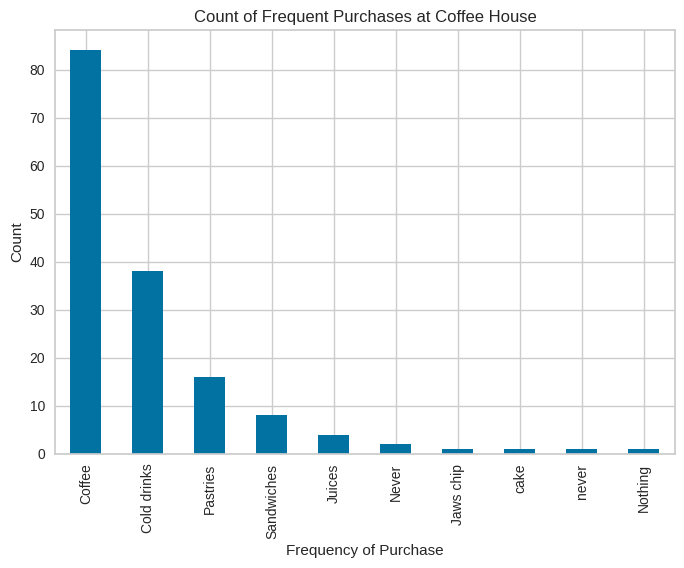

In [151]:
df.explode('Frequent purchase at coffee house')['Frequent purchase at coffee house'].value_counts().plot.bar()
# Add labels and title
plt.xlabel('Frequency of Purchase')
plt.ylabel('Count')
plt.title('Count of Frequent Purchases at Coffee House')

# Show the plot
plt.show()

In [152]:
EnjoymentFrequency = df['Medium of promotions'].value_counts()
print(EnjoymentFrequency)

Medium of promotions
Social Media                                                                                                                                   31
Social Media;Through friends and word of mouth                                                                                                 14
Through friends and word of mouth                                                                                                               9
Starbucks Website/Apps;Social Media                                                                                                             9
In Store displays                                                                                                                               7
Starbucks Website/Apps;Social Media;Emails;Through friends and word of mouth                                                                    6
Starbucks Website/Apps;Social Media;Through friends and word of mouth                                  

In [153]:
df['Medium of promotions'] = df['Medium of promotions'].str.strip()

In [154]:
df['Medium of promotions'] = df['Medium of promotions'].str.split(';')


In [155]:
df[['Medium of promotions']]

,Medium of promotions
0,"[Starbucks Website/Apps, Social Media, Emails,..."
1,"[Social Media, In Store displays]"
2,"[In Store displays, Billboards]"
3,[Through friends and word of mouth]
4,"[Starbucks Website/Apps, Social Media]"
...,...
118,"[Starbucks Website/Apps, Social Media, Emails,..."
119,"[Social Media, Through friends and word of mou..."
120,"[Social Media, Through friends and word of mou..."
121,[In Store displays]


In [156]:
frequency = df.explode('Medium of promotions')['Medium of promotions'].value_counts()

In [157]:
print(frequency)

Medium of promotions
Social Media                         89
Through friends and word of mouth    49
Starbucks Website/Apps               35
In Store displays                    21
Emails                               18
Billboards                           11
Deal sites (fave, iprice, etc...)     7
Application offer                     1
Never hear                            1
Name: count, dtype: int64


Text(0.5, 1.0, 'Count of Promotions by Medium')

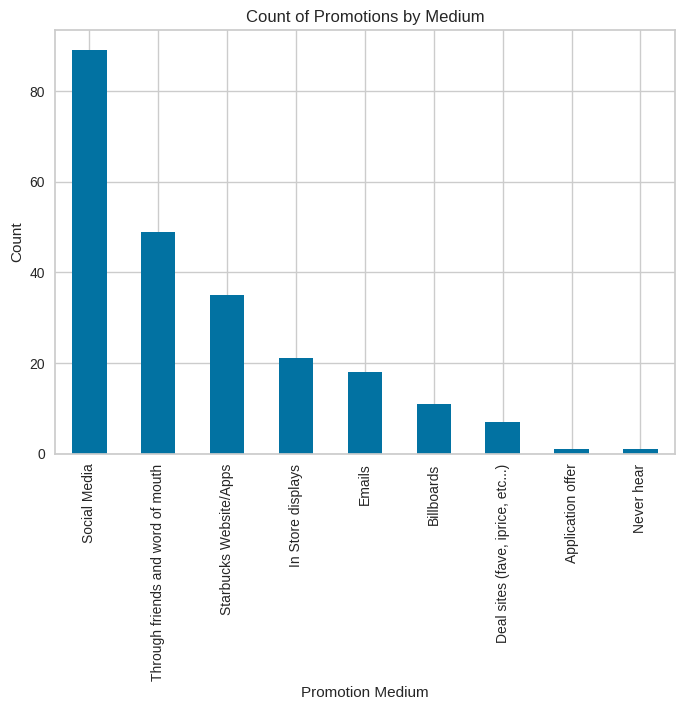

In [158]:
df.explode('Medium of promotions')['Medium of promotions'].value_counts().plot.bar()
# Add labels and title
plt.xlabel('Promotion Medium')
plt.ylabel('Count')
plt.title('Count of Promotions by Medium')

In [159]:
df = df.drop(['Timestamp','Age', 'Per visit spend at coffee house', 'Annual Income', 'Frequency of Visit', 'Occupation Status', 'Time spend at cafe', 'Nearest coffee house', 'Frequency enjoying coffe house', 'Frequency_enjoying_coffee_house','Frequent purchase at coffee house', 'Medium of promotions'], axis=1)

In [160]:
df.head(1)

,Rate quality of coffee,Rate of price range,Factors to purchase Decision,Ambiance Rate,Rate WiFi Quality,Rate service quality,Choose for business meeting or hangout,Buying Coffee?,Gender_Female,Gender_Male,Membership_No,Membership_Yes,Average Age,Numerical Income,Numerical Distance,Numerical Time,Average spend,Frequency of visit (Numerical),OccupationStatus (Numerical),EnjoyingFrequency (Numerical)
0,4.0,3.0,5.0,5.0,4.0,4.0,3.0,Yes,1.0,0.0,0.0,1.0,25.0,25000.0,0.5,45.0,15.0,1.0,2.0,2.0


In [161]:
df.columns

Index(['Rate quality of coffee', 'Rate of price range',
       'Factors to purchase Decision', 'Ambiance Rate', 'Rate WiFi Quality',
       'Rate service quality', 'Choose for business meeting or hangout',
       'Buying Coffee?', 'Gender_Female', 'Gender_Male', 'Membership_No',
       'Membership_Yes', 'Average Age', 'Numerical Income',
       'Numerical Distance', 'Numerical Time', 'Average spend',
       'Frequency of visit (Numerical)', 'OccupationStatus (Numerical)',
       'EnjoyingFrequency (Numerical)'],
      dtype='object')

In [162]:
# Chceking null values after preprocessing raw data and converting all categorical into numerical#
df.isnull().sum()

Rate quality of coffee                    1
Rate of price range                       1
Factors to purchase Decision              1
Ambiance Rate                             1
Rate WiFi Quality                         1
Rate service quality                      1
Choose for business meeting or hangout    1
Buying Coffee?                            1
Gender_Female                             1
Gender_Male                               1
Membership_No                             1
Membership_Yes                            1
Average Age                               1
Numerical Income                          1
Numerical Distance                        1
Numerical Time                            1
Average spend                             1
Frequency of visit (Numerical)            1
OccupationStatus (Numerical)              1
EnjoyingFrequency (Numerical)             1
dtype: int64

In [163]:
# Dropping null values gotten after preprocessing to ensure there is no null values into X_train#
df_clean = df.dropna()

In [164]:
df_clean.isnull().sum()

Rate quality of coffee                    0
Rate of price range                       0
Factors to purchase Decision              0
Ambiance Rate                             0
Rate WiFi Quality                         0
Rate service quality                      0
Choose for business meeting or hangout    0
Buying Coffee?                            0
Gender_Female                             0
Gender_Male                               0
Membership_No                             0
Membership_Yes                            0
Average Age                               0
Numerical Income                          0
Numerical Distance                        0
Numerical Time                            0
Average spend                             0
Frequency of visit (Numerical)            0
OccupationStatus (Numerical)              0
EnjoyingFrequency (Numerical)             0
dtype: int64

In [165]:
df.columns

Index(['Rate quality of coffee', 'Rate of price range',
       'Factors to purchase Decision', 'Ambiance Rate', 'Rate WiFi Quality',
       'Rate service quality', 'Choose for business meeting or hangout',
       'Buying Coffee?', 'Gender_Female', 'Gender_Male', 'Membership_No',
       'Membership_Yes', 'Average Age', 'Numerical Income',
       'Numerical Distance', 'Numerical Time', 'Average spend',
       'Frequency of visit (Numerical)', 'OccupationStatus (Numerical)',
       'EnjoyingFrequency (Numerical)'],
      dtype='object')

In [166]:
X = df_clean[[
       'Rate quality of coffee', 'Rate of price range',
       'Factors to purchase Decision', 'Ambiance Rate', 'Rate WiFi Quality',
       'Rate service quality', 'Choose for business meeting or hangout',
       'Gender_Female',
       'Gender_Male', 'Membership_No', 'Membership_Yes', 'Average Age',
       'Numerical Income', 'Numerical Distance', 'Numerical Time',
       'Average spend', 'Frequency of visit (Numerical)',
       'OccupationStatus (Numerical)', 'EnjoyingFrequency (Numerical)']]

In [167]:
X

,Rate quality of coffee,Rate of price range,Factors to purchase Decision,Ambiance Rate,Rate WiFi Quality,Rate service quality,Choose for business meeting or hangout,Gender_Female,Gender_Male,Membership_No,Membership_Yes,Average Age,Numerical Income,Numerical Distance,Numerical Time,Average spend,Frequency of visit (Numerical),OccupationStatus (Numerical),EnjoyingFrequency (Numerical)
0,4.0,3.0,5.0,5.0,4.0,4.0,3.0,1.0,0.0,0.0,1.0,25.0,25000.0,0.5,45.0,15.0,1.0,2.0,2.0
1,4.0,3.0,4.0,4.0,4.0,5.0,2.0,1.0,0.0,0.0,1.0,25.0,25000.0,2.0,15.0,15.0,1.0,2.0,1.0
2,4.0,3.0,4.0,4.0,4.0,4.0,3.0,0.0,1.0,0.0,1.0,25.0,25000.0,5.0,45.0,15.0,2.0,1.0,2.0
3,2.0,1.0,4.0,3.0,3.0,3.0,3.0,1.0,0.0,1.0,0.0,25.0,25000.0,5.0,15.0,15.0,1.0,2.0,1.0
4,3.0,3.0,4.0,2.0,2.0,3.0,3.0,0.0,1.0,1.0,0.0,25.0,25000.0,2.0,45.0,30.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,4.0,4.0,5.0,4.0,2.0,3.0,4.0,0.0,1.0,0.0,1.0,35.0,25000.0,5.0,90.0,15.0,2.0,2.0,2.0
117,3.0,3.0,5.0,3.0,2.0,4.0,4.0,0.0,1.0,0.0,1.0,70.0,37500.0,2.0,90.0,30.0,2.0,3.0,2.0
118,5.0,5.0,5.0,5.0,5.0,5.0,5.0,0.0,1.0,1.0,0.0,25.0,25000.0,2.0,90.0,40.0,2.0,1.0,2.0
119,3.0,2.0,4.0,3.0,3.0,3.0,4.0,1.0,0.0,1.0,0.0,25.0,25000.0,2.0,45.0,15.0,1.0,2.0,2.0


In [168]:
y = df['Buying Coffee?']

In [169]:
print(f"Length of X: {len(X)}")
print(f"Length of y: {len(y)}")


Length of X: 120
Length of y: 122


In [170]:
# deleting null values to make all values equal in both X_train and y_train#
X = df_clean.drop(columns=['Buying Coffee?'])
y = df_clean['Buying Coffee?']

print(f"Length of X after dropping nulls: {len(X)}")
print(f"Length of y after dropping nulls: {len(y)}")

Length of X after dropping nulls: 120
Length of y after dropping nulls: 120


# Logistic Regression Aproach


In [171]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80, random_state=42)
X_train
X_train.shape
X_test.shape

(24, 19)

In [172]:
print(X_train.head())  # If X_train is a DataFrame
print(y_train.head())  # If y_train is a Series or DataFrame

print(type(X_train))   # To check the type of X_train
print(type(y_train))   # To check the type of y_train


     Rate quality of coffee  Rate of price range  \
42                      5.0                  4.0   
12                      4.0                  3.0   
15                      4.0                  1.0   
115                     5.0                  5.0   
76                      4.0                  2.0   

     Factors to purchase Decision  Ambiance Rate  Rate WiFi Quality  \
42                            5.0            5.0                1.0   
12                            2.0            4.0                4.0   
15                            5.0            4.0                3.0   
115                           5.0            5.0                5.0   
76                            5.0            3.0                2.0   

     Rate service quality  Choose for business meeting or hangout  \
42                    4.0                                     4.0   
12                    3.0                                     4.0   
15                    4.0                            

In [173]:
lrm = LogisticRegression()

In [174]:
lrm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [175]:
lrm.predict(X_test)

array(['Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'Yes'], dtype=object)

In [176]:
lrm.coef_

array([[ 1.20382986e-01,  2.00812463e-01, -5.55829078e-02,
         1.17506750e-01,  3.68695463e-02,  7.79031610e-03,
         1.65217772e-01, -7.95833119e-02,  6.03160129e-02,
        -5.74734641e-02,  3.82061651e-02, -4.96883432e-02,
         7.59572057e-07, -1.65732693e-01, -7.35945270e-03,
         7.55573552e-02,  5.62508446e-02, -3.58045974e-02,
         9.14248010e-04]])

In [177]:
lrm.intercept_

array([-0.01925672])

**Desision-Tree Approach**

In [178]:
X = df_clean[['Rate quality of coffee', 'Rate of price range',
       'Factors to purchase Decision', 'Ambiance Rate', 'Rate WiFi Quality',
       'Rate service quality', 'Choose for business meeting or hangout',
       'Gender_Female',
       'Gender_Male', 'Membership_No', 'Membership_Yes', 'Average Age',
       'Numerical Income', 'Numerical Distance', 'Numerical Time',
       'Average spend', 'Frequency of visit (Numerical)',
       'OccupationStatus (Numerical)', 'EnjoyingFrequency (Numerical)']]

In [179]:
y = df['Buying Coffee?']

In [180]:
# deleting null values to make all values equal in both X_train and y_train#
X = df_clean.drop(columns=['Buying Coffee?'])
y = df_clean['Buying Coffee?']

print(f"Length of X after dropping nulls: {len(X)}")
print(f"Length of y after dropping nulls: {len(y)}")

Length of X after dropping nulls: 120
Length of y after dropping nulls: 120


In [181]:
# Check the type of X_train
print(type(X_train))

# If it's a DataFrame, check the types of each column
if isinstance(X_train, pd.DataFrame):
    print(X_train.dtypes)

    # Find columns that contain lists
    for column in X_train.columns:
        if X_train[column].apply(lambda x: isinstance(x, list)).any():
            print(f"Column {column} contains lists")
else:
    # If it's not a DataFrame, you might need to inspect it differently
    print("X_train is not a DataFrame")

<class 'pandas.core.frame.DataFrame'>
Rate quality of coffee                    float64
Rate of price range                       float64
Factors to purchase Decision              float64
Ambiance Rate                             float64
Rate WiFi Quality                         float64
Rate service quality                      float64
Choose for business meeting or hangout    float64
Gender_Female                             float64
Gender_Male                               float64
Membership_No                             float64
Membership_Yes                            float64
Average Age                               float64
Numerical Income                          float64
Numerical Distance                        float64
Numerical Time                            float64
Average spend                             float64
Frequency of visit (Numerical)            float64
OccupationStatus (Numerical)              float64
EnjoyingFrequency (Numerical)             float64
dtype: objec

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80, random_state=42)

In [183]:
DecisionTreeClassifier()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None, splitter='best')

In [184]:
dtc = DecisionTreeClassifier()

In [185]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None, splitter='best')

In [186]:
y_pred = dtc.predict(X_test)

In [187]:
y_test

44     Yes
47     Yes
4      Yes
55     Yes
26      No
64      No
73     Yes
10     Yes
40     Yes
108     No
18     Yes
62     Yes
11      No
36     Yes
90     Yes
92      No
110     No
0      Yes
89     Yes
105    Yes
65      No
45     Yes
31     Yes
70     Yes
Name: Buying Coffee?, dtype: object

In [188]:
confusion_matrix(y_test, y_pred)

array([[ 5,  2],
       [ 3, 14]])

In [189]:
accuracy_score(y_test, y_pred)

0.7916666666666666

In [190]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.62      0.71      0.67         7
         Yes       0.88      0.82      0.85        17

    accuracy                           0.79        24
   macro avg       0.75      0.77      0.76        24
weighted avg       0.80      0.79      0.80        24



**KNN Classifier**

In [191]:
X = df[['Rate quality of coffee', 'Rate of price range',
       'Factors to purchase Decision', 'Ambiance Rate', 'Rate WiFi Quality',
       'Rate service quality', 'Choose for business meeting or hangout',
       'Gender_Female',
       'Gender_Male', 'Membership_No', 'Membership_Yes', 'Average Age',
       'Numerical Income', 'Numerical Distance', 'Numerical Time',
       'Average spend', 'Frequency of visit (Numerical)',
       'OccupationStatus (Numerical)', 'EnjoyingFrequency (Numerical)']]

In [192]:
y = df['Buying Coffee?']

In [193]:
# deleting null values to make all values equal in both X_train and y_train#
X = df_clean.drop(columns=['Buying Coffee?'])
y = df_clean['Buying Coffee?']

print(f"Length of X after dropping nulls: {len(X)}")
print(f"Length of y after dropping nulls: {len(y)}")

Length of X after dropping nulls: 120
Length of y after dropping nulls: 120


In [194]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80, random_state=42)

In [195]:
knn = KNeighborsClassifier()

In [196]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [197]:
y_pred = knn.predict(X_test)

In [198]:
confusion_matrix(y_test, y_pred)

array([[ 2,  5],
       [ 1, 16]])

In [199]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.67      0.29      0.40         7
         Yes       0.76      0.94      0.84        17

    accuracy                           0.75        24
   macro avg       0.71      0.61      0.62        24
weighted avg       0.73      0.75      0.71        24



**Random Forest**

In [200]:
X = df[['Rate quality of coffee', 'Rate of price range',
       'Factors to purchase Decision', 'Ambiance Rate', 'Rate WiFi Quality',
       'Rate service quality', 'Choose for business meeting or hangout',
       'Gender_Female',
       'Gender_Male', 'Membership_No', 'Membership_Yes', 'Average Age',
       'Numerical Income', 'Numerical Distance', 'Numerical Time',
       'Average spend', 'Frequency of visit (Numerical)',
       'OccupationStatus (Numerical)', 'EnjoyingFrequency (Numerical)']]

In [201]:
y = df['Buying Coffee?']

In [202]:
# deleting null values to make all values equal in both X_train and y_train#
X = df_clean.drop(columns=['Buying Coffee?'])
y = df_clean['Buying Coffee?']

print(f"Length of X after dropping nulls: {len(X)}")
print(f"Length of y after dropping nulls: {len(y)}")

Length of X after dropping nulls: 120
Length of y after dropping nulls: 120


In [203]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80, random_state=42)

In [204]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [205]:
confusion_matrix(y_test, y_pred)

array([[ 2,  5],
       [ 2, 15]])

In [206]:
y_pred

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes'], dtype=object)

In [207]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.50      0.29      0.36         7
         Yes       0.75      0.88      0.81        17

    accuracy                           0.71        24
   macro avg       0.62      0.58      0.59        24
weighted avg       0.68      0.71      0.68        24



In [208]:
X = df_clean[[
       'Rate quality of coffee', 'Rate of price range',
       'Factors to purchase Decision', 'Ambiance Rate', 'Rate WiFi Quality',
       'Rate service quality', 'Choose for business meeting or hangout',
       'Gender_Female',
       'Gender_Male', 'Membership_No', 'Membership_Yes', 'Average Age',
       'Numerical Income', 'Numerical Distance', 'Numerical Time',
       'Average spend', 'Frequency of visit (Numerical)',
       'OccupationStatus (Numerical)', 'EnjoyingFrequency (Numerical)']]

In [209]:
y = df['Buying Coffee?']

In [210]:
clf = setup(df_clean, target = 'Buying Coffee?')

,Description,Value
0,Session id,4085
1,Target,Buying Coffee?
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(120, 20)"
5,Transformed data shape,"(120, 20)"
6,Transformed train set shape,"(84, 20)"
7,Transformed test set shape,"(36, 20)"
8,Numeric features,19
9,Preprocess,True


In [211]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8347,0.7738,0.8347,0.8240,0.8121,0.4386,0.4656,0.3610
xgboost,Extreme Gradient Boosting,0.8236,0.7857,0.8236,0.8185,0.8030,0.4211,0.4488,0.2560
ridge,Ridge Classifier,0.8208,0.8238,0.8208,0.7979,0.7968,0.3358,0.3571,0.0910
rf,Random Forest Classifier,0.8208,0.8185,0.8208,0.7802,0.7884,0.2965,0.3180,0.6270
nb,Naive Bayes,0.8111,0.7524,0.8111,0.8014,0.7973,0.3957,0.4089,0.0750
et,Extra Trees Classifier,0.8111,0.7661,0.8111,0.7856,0.7880,0.3538,0.3707,0.4180
lda,Linear Discriminant Analysis,0.8097,0.8238,0.8097,0.8006,0.7935,0.3716,0.3949,0.0730
svm,SVM - Linear Kernel,0.7861,0.5714,0.7861,0.6201,0.6927,0.0000,0.0000,0.1060
dummy,Dummy Classifier,0.7861,0.5000,0.7861,0.6201,0.6927,0.0000,0.0000,0.0370
lr,Logistic Regression,0.7750,0.7571,0.7750,0.7678,0.7654,0.3091,0.3184,1.7220


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4085, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [212]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)
print("Training Accuracy score: "+str(round(accuracy_score(y_train,y_pred_train),4)))
print("Testing Accuracy score: "+str(round(accuracy_score(y_test,y_pred_test),4)))

Training Accuracy score: 0.8958
Testing Accuracy score: 0.7917


In [214]:
df.to_csv('processed_dataset.csv', index=False)

In [215]:
files.download('processed_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>